# Проверка гипотез с целью увеличения выручки интернет-магазина

Описание проекта:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


**Цель проекта:**

* Выявить приоритетность гипотез
* Проанализировать А/В тест и ответить на вопрос - стоит ли продолжить тест, или обьявить победу одной из групп.


### Часть 1.  
### Приоритизация гипотез.

Откроем файлы с данными и изучмим информацию.

In [1]:
# Импортируем необходимые для работы библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt
import scipy.stats as stats

In [2]:
# Прочитаем файлы с данными

try:
    hypothesis = pd.read_csv('./datasets/hypothesis.csv')
    orders = pd.read_csv('./datasets/orders.csv')
    visitors = pd.read_csv('./datasets/visitors.csv')
    
    
except FileNotFoundError:
    
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    

In [3]:
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

**1. Примените фреймворк ICE и RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло.**

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:

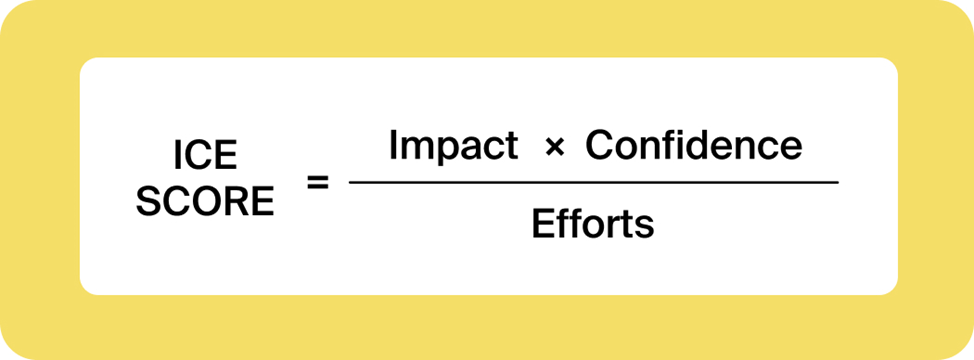

У этого метода есть модификация RICE (R от англ. reach, «охват»):

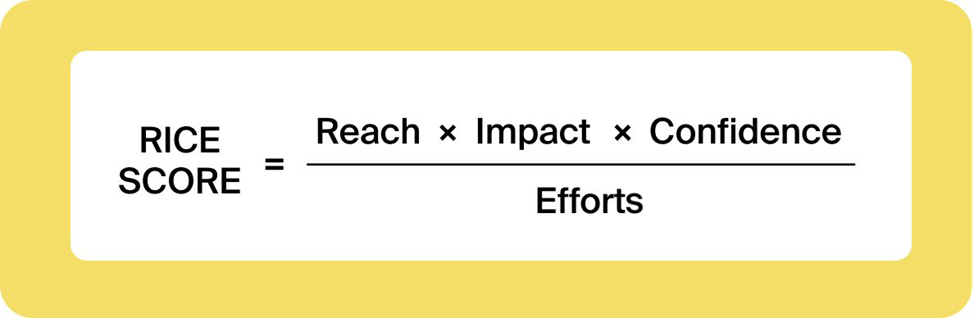

Фреймворк RICE состоит из четырёх компонент:
* ``Reach`` — скольких пользователей затронет изменение, которое вы хотите внести;
* ``Impact`` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* ``Confidence`` — насколько вы уверены, что это изменение повлияет на пользователей именно так;
* ``Efforts`` — сколько стоит протестировать эту гипотезу.

Посчитаем показатели ``ICE`` и ``RICE`` для каждой гипотезы. Создадим новые столбцы.

Пронумеруем гипотезы для читабельности.

* Гипотеза 1 - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
* Гипотеза 2 - 'Запустить собственную службу доставки, что сократит срок доставки заказов',
* Гипотеза 3 - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
* Гипотеза 4 - 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
* Гипотеза 5 - 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
* Гипотеза 6 - 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
* Гипотеза 7 - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
* Гипотеза 8 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
* Гипотеза 9 - 'Запустить акцию, дающую скидку на товар в день рождения'.


In [5]:
def hypothesis_number(row):
    if row['Hypothesis'] == 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей':
        return 'Гипотеза 1'
    if row['Hypothesis'] == 'Запустить собственную службу доставки, что сократит срок доставки заказов':
        return 'Гипотеза 2'
    if row['Hypothesis'] == 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа':
        return 'Гипотеза 3'
    if row['Hypothesis'] == 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар':
        return 'Гипотеза 4'
    if row['Hypothesis'] == 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей':
        return 'Гипотеза 5'
    if row['Hypothesis'] == 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов':
        return 'Гипотеза 6'
    if row['Hypothesis'] == 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию':
        return 'Гипотеза 7'
    if row['Hypothesis'] == 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок':
        return 'Гипотеза 8'
    if row['Hypothesis'] == 'Запустить акцию, дающую скидку на товар в день рождения':
        return 'Гипотеза 9'

    
hypothesis['hypothesis_number'] = hypothesis.apply(hypothesis_number, axis = 1)

In [6]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,hypothesis_number,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,Гипотеза 1,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,Гипотеза 2,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,Гипотеза 3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,Гипотеза 4,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,Гипотеза 5,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,Гипотеза 6,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,Гипотеза 7,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,Гипотеза 8,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,Гипотеза 9,16.200000,16.2


In [7]:
display(round(hypothesis[['hypothesis_number','ICE']].sort_values(by='ICE', ascending=False), 2))
hypothesis[['hypothesis_number','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis_number,ICE
8,Гипотеза 9,16.20
0,Гипотеза 1,13.33
7,Гипотеза 8,11.20
6,Гипотеза 7,8.00
2,Гипотеза 3,7.00
1,Гипотеза 2,2.00
5,Гипотеза 6,1.33
3,Гипотеза 4,1.12
4,Гипотеза 5,1.00


,hypothesis_number,RICE
7,Гипотеза 8,112.0
2,Гипотеза 3,56.0
0,Гипотеза 1,40.0
6,Гипотеза 7,40.0
8,Гипотеза 9,16.2
3,Гипотеза 4,9.0
1,Гипотеза 2,4.0
5,Гипотеза 6,4.0
4,Гипотеза 5,3.0


Приоритеты гипотез существенно изменились, так как фреймворк RICE содержит компонент ``reach``, который показывает какую по численности аудиторию затронет изменение, которое планируется внести.

* При расчете ICE наиболее перспективные гипотезы - 9, 1, 8, 7, 3
* При расчете RICE наиболее перспективные гипотезы - 8, 3, 1, 7, 9

И первый и второй метод выделяет пять приоритетных- гипотез - 1, 3, 7, 8 и 9-ую. Только меняется последовательность их по приоритетности.

**Вывод.**

Применив фреймворк ICE и RICE для приоритизации гипотез вы выяснили, что наиболее приоритетные гипотезы с учетом того, как много пользователей они затронут, это следующие гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
* Запустить акцию, дающую скидку на товар в день рождения.

## Часть 2.
## Анализ A/B-теста

Прочтем файлы ``orders.csv`` и ``visitors.csv``. Изучим информацию.

In [8]:
display(orders)
visitors

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
orders.query('group == "A"')['visitorId'].nunique()

503

In [12]:
orders.query('group == "B"')['visitorId'].nunique()

586

In [13]:
orders.query('group == "A"')['visitorId'].count()

557

In [14]:
orders.query('group == "B"')['visitorId'].count()

640

In [15]:
uniqueA = orders.query('group == "A"')['visitorId'].unique()

In [16]:
orders.query('group == "B" and visitorId in @uniqueA')

,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
27,1630050528,237748145,2019-08-15,7620,B
32,3666913472,2038680547,2019-08-15,1680,B
...,...,...,...,...,...
1172,3898641900,3803269165,2019-08-14,790,B
1175,1373388206,3717692402,2019-08-14,2400,B
1182,2682156369,1668030113,2019-08-14,1290,B
1184,1329499668,2949041841,2019-08-14,10380,B


In [17]:
orders.query('group == "B" and visitorId not in @uniqueA')

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1186,2116724386,2146711261,2019-08-14,15380,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B


Размеры выборок отличаются незначительно. Аудитории в большинстве своем разные.

In [18]:
orders = orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

In [19]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d', errors='ignore')          # приведем столбцы к типу дата
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d', errors='ignore')

In [20]:
orders[['transaction_id','visitor_id']] = orders[['transaction_id','visitor_id']].astype(object)

In [21]:
print(orders.query('group == "B"').date.agg(['min','max']).apply('{:%d %B %Y}'.format))
print(orders.query('group == "A"').date.agg(['min','max']).apply('{:%d %B %Y}'.format))

min    01 August 2019
max    31 August 2019
Name: date, dtype: object
min    01 August 2019
max    31 August 2019
Name: date, dtype: object


Итак мы привели данные к нужным типам, изучили их содержание. Продолжим анализ А/В теста поэтапно.

In [22]:
orders.duplicated().sum()

0

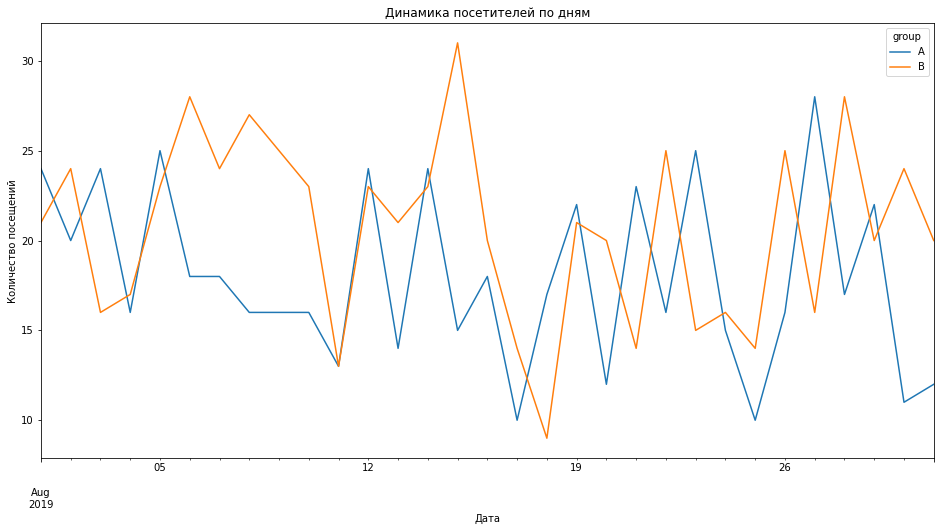

In [23]:
(
    orders.
    pivot_table(index='date', values='visitor_id', columns='group', aggfunc ='count').
    plot(title = 'Динамика посетителей по дням', figsize = (16,8))
)
plt.xlabel('Дата')
plt.ylabel('Количество посещений')
plt.show()

В целом визуально можно определить, что посещений в группе В больше, особенно в первой половине месяца. Так же можно заметить закономерность, что динамика посещений колеблется изо дня в день, причем в один день большое количество посещений в группе В соответствует малой активности в группе А, и наоборот.

**1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм ``cumulativeData`` со столбцами:
*	``date`` — дата;
*	``group`` — группа A/B-теста (A или B);
*	``orders`` — кумулятивное количество заказов на указанную дату в указанной группе;
*	``buyers`` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
*	``revenue`` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
*	``visitors`` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.
Получим строки таблицы ``orders``, дата которых меньше или равна дате элемента из ``datesGroups``, а группа теста равна группе из ``datesGroups``:

In [25]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.
    apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
          agg({'date' : 'max',
               'group' : 'max',
               'transaction_id' : 'nunique',
               'visitor_id' : 'nunique',
               'revenue' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.
    apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].
          agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)

ordersAggregated = ordersAggregated.sort_values(by=['date','group'])

visitorsAggregated = visitorsAggregated.sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Перейдем к построению графиков.

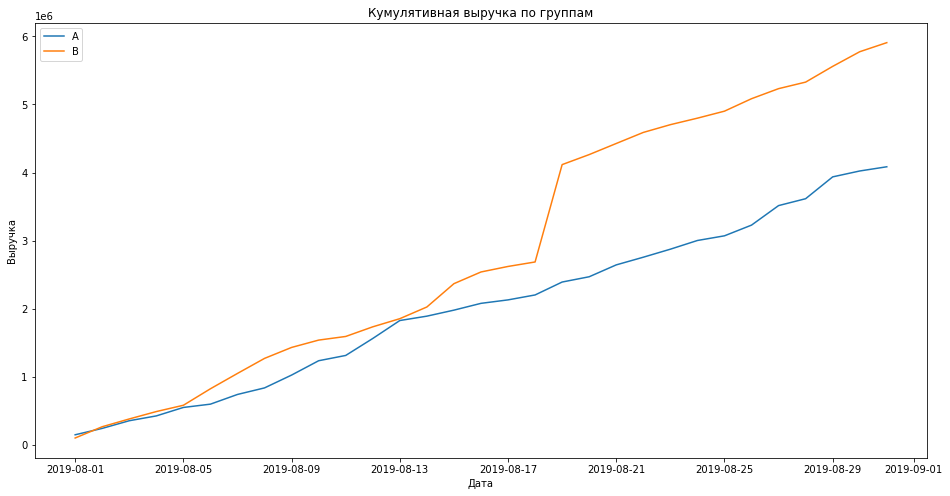

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(16, 8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()


Сегмент В лидировал практически весь период проведения теста. Необходимо не забывать о влиянии аномально больших заказов на результат теста. При заключительном анализе их нужно будет удалить, если они есть. По графику можно увидеть, что 19.08.2021 года был совершен заказ на аномально большую сумму. Этот факт нужно изучить более детально.

**2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

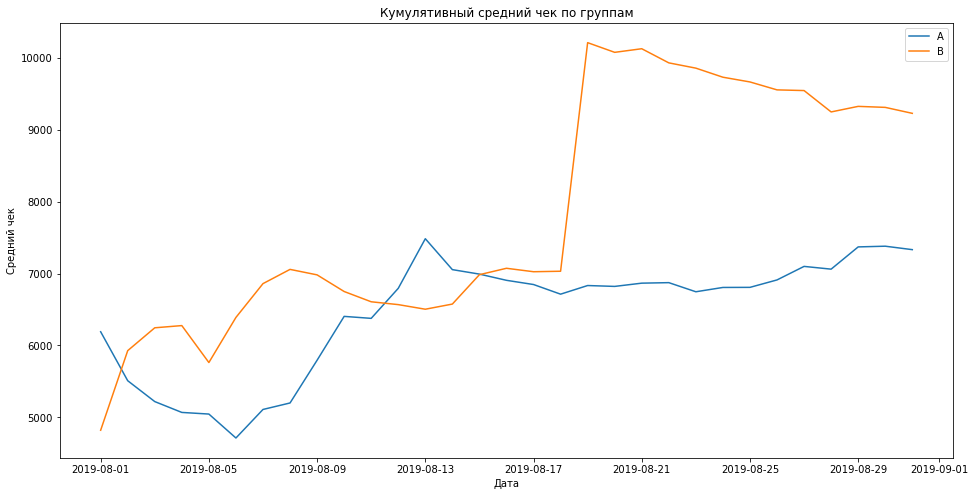

In [27]:
plt.figure(figsize=(16, 8))

# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Кумулятивное значение среднего чека по сегментам сильно колеблется. 19 августа произошел резкий скачок размера среднего чека в сегменте В. В сегменте А показатель так же не стабилен. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые сильно искажают результаты.

**3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

Для этого объединим таблицы ``cumulativeRevenueA`` и ``cumulativeRevenueB`` методом merge().

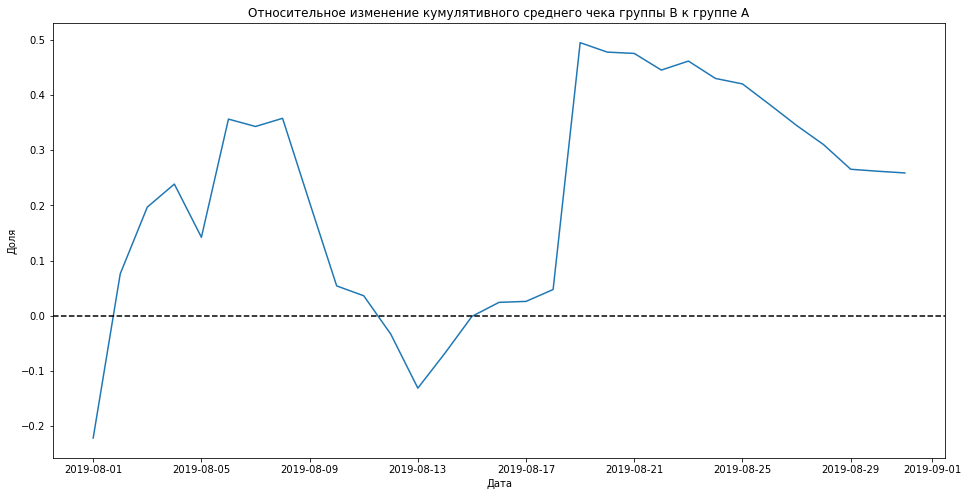

In [28]:
mergedCumulativeRevenue = (
    cumulativeRevenueA.
    merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(16, 8))

# cтроим отношение средних чеков
plt.plot\
(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']\
/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']\
/mergedCumulativeRevenue['ordersA'])-1,\
 label="Относительный прирост конверсии группы B относительно группы A")

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.show()

Мы построили график относительного различия в среднем чеке между группами. Результаты теста значительно и резко менялись в несколько дат. Видимо, именно в эти даты были совершены аномальные заказы.

**4.	Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.**

Добавим в ``cumulativeData`` столбец ``conversion`` c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

Объявим переменные ``cumulativeDataA`` и ``cumulativeDataB``, в которых сохраним данные о заказах в сегментах A и B соответственно.

Построим графики кумулятивной конверсии по дням по группам.


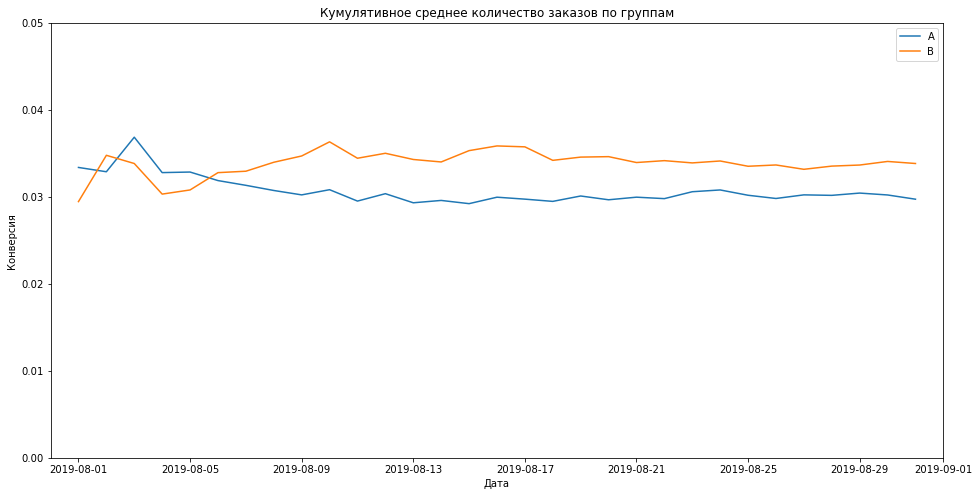

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData.query('group == "A"')
cumulativeDataB = cumulativeData.query('group == "B"')


plt.figure(figsize=(16, 8))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале теста сегмент A переодически имел большую конверсию, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.
Мы изменили масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 3% до 4%. В относительных величинах — это почти в 1,3 раза.

**5.	Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.**

Объединим таблицы ``cumulativeDataA`` и ``cumulativeDataB``. 

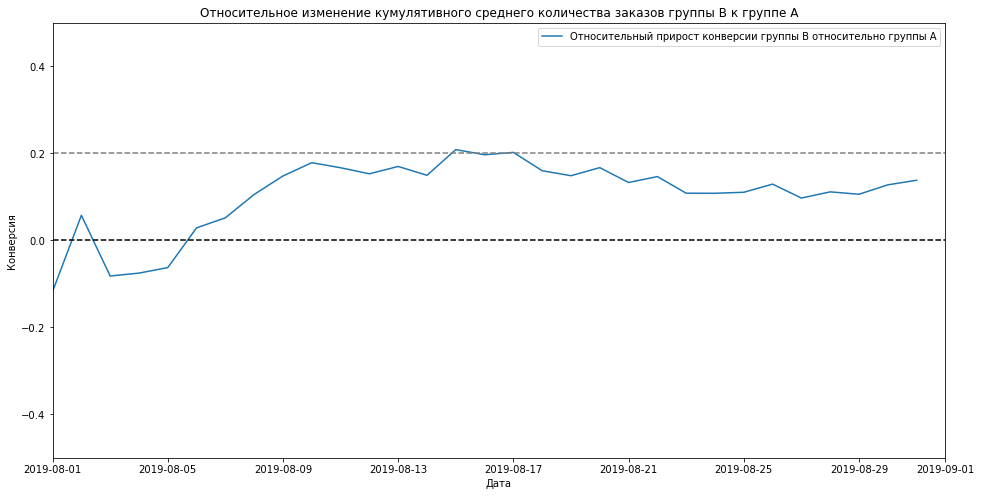

In [30]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].
    merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(16, 8))

plt.plot(mergedCumulativeConversions['date'],\
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

Мы построили график относительного различия конверсии между группами.
Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше до середины теста, дошла до отметки в 20% относительно группы A, затем идет на спад до 10 %.

**6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [31]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitors', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 


,visitors,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи которые совершали 11, 9 и 8 заказов за весь период. Построим точечную диаграмму числа заказов на одного пользователя:

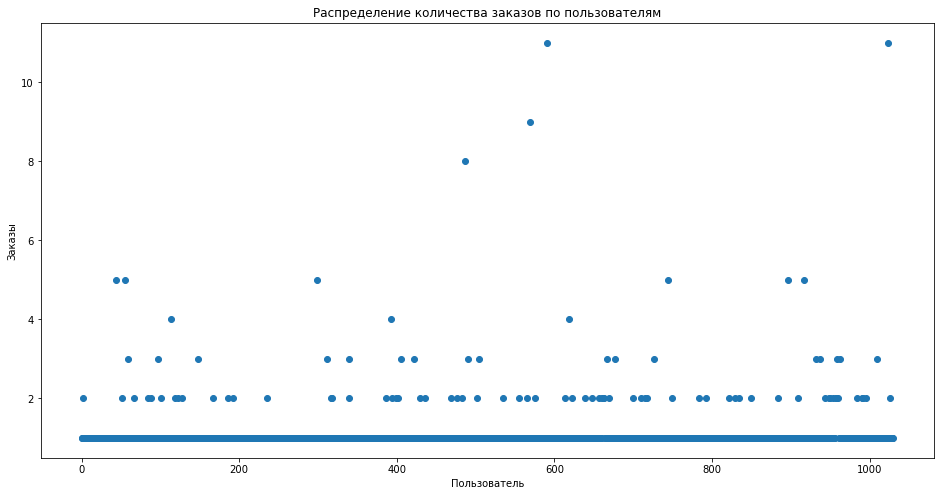

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(16, 8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Заказы')
plt.show()

Большинство пользователей совершали по 1 заказу, но есть часть пользователей, которые совершали по 2 заказа и более. Исходя из графика нельзя однозначно определить аномальные значения для данного показателя.

**7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

Для определения аномалий в данных принято отсеивать от 1% до 5% наблюдений с крайними значениями.

Если делить упорядоченную выборку на 100 — получим перцентиль (от лат. per centum + ile, «на сотню, процент»). N-й выборочный перцентиль — значение, больше которого определённая доля элементов выборки. Найдем 95-й и 99-й перцентиль.

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли от 2 заказов. Примем за аномальные значения число заказов от 2 и более. 

**8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

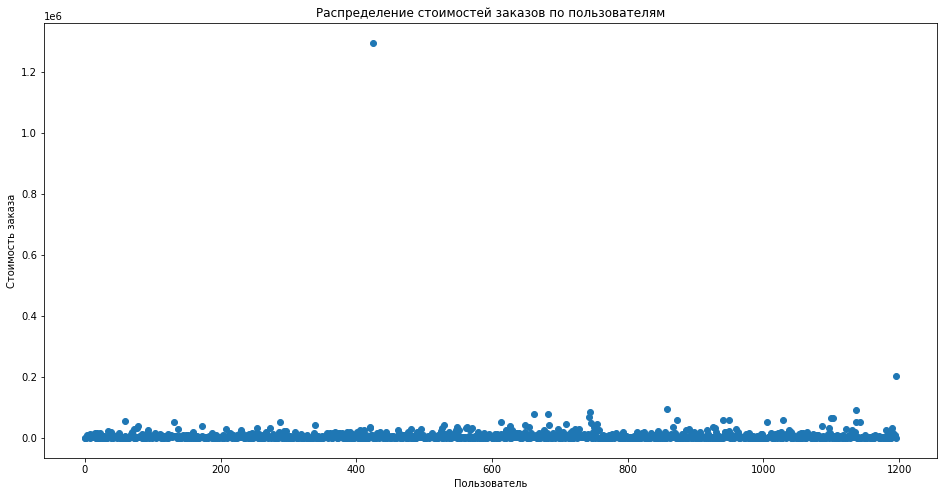

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(16, 8))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказа')
plt.show()

Исходя из графика, есть несколько дорогих заказов. Можно выбрать границу аномальных заказов более 100 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

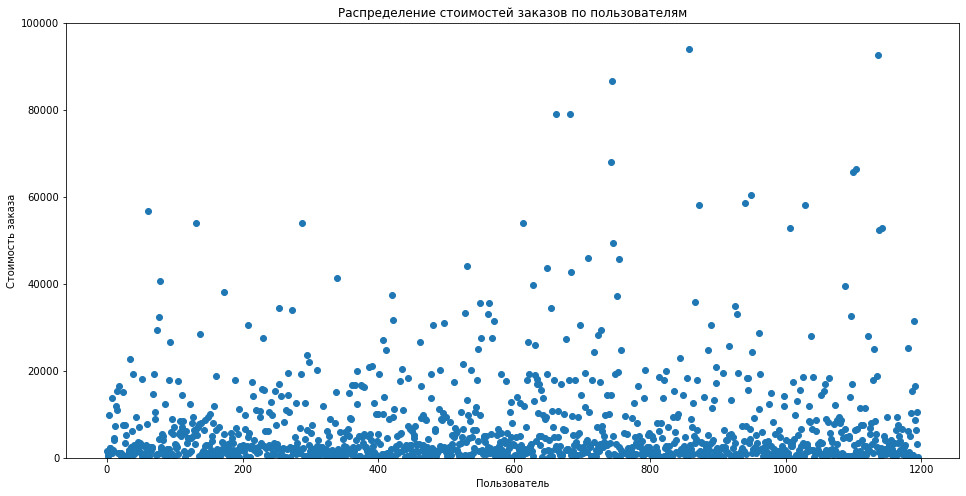

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(16, 8))
plt.scatter(x_values, orders['revenue'])
plt.ylim(top = 100000, bottom = 0)
plt.title('Распределение стоимостей заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказа')
plt.show()

Сложно наглядно определить, какие из значений стоимостей заказов являются аномальными, поэтому воспользуемся расчетами.

**9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [36]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. За аномальные значения примем заказы дороже 28 000 рублей.

**10.	Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.**

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Напомним названия столбцов данных:
*	``date`` — дата;
*	``ordersPerDateA`` — количество заказов в выбранную дату в группе A;
*	``revenuePerDateA`` — суммарная выручка в выбранную дату в группе A;
*	``ordersPerDateB`` — количество заказов в выбранную дату в группе B;
*	``revenuePerDateB`` — суммарная выручка в выбранную дату в группе B;
*	``ordersCummulativeA`` — суммарное число заказов до выбранной даты включительно в группе A;
*	``revenueCummulativeA`` — суммарная выручка до выбранной даты включительно в группе A;
*	``ordersCummulativeB`` — суммарное количество заказов до выбранной даты включительно в группе B;
*	``revenueCummulativeB`` — суммарная выручка до выбранной даты включительно в группе B;
*	``visitorsPerDateA`` — количество пользователей в выбранную дату в группе A;
*	``visitorsPerDateB`` — количество пользователей в выбранную дату в группе B;
*	``visitorsCummulativeA`` — количество пользователей до выбранной даты включительно в группе A;
*	``visitorsCummulativeB`` — количество пользователей до выбранной даты включительно в группе B.


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ``ordersByUsersA`` и ``ordersByUsersB`` со столбцами ``visitor_id``, ``orders``. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 


Объявим переменные ``sampleA`` и ``sampleB``, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [39]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value - {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("различие в средних - {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value - 0.01679
различие в средних - 0.138


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.


**11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами:


In [40]:
print('p-value - {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                    orders[orders['group']=='B']['revenue'])[1]))
print('различие в средних - {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/\
                                            orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value - 0.729
различие в средних - 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A - практически на 26%. Наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

**12.	Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.**

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 1 — ``usersWithManyOrders`` и пользователей, совершивших заказы дороже 28 000 — ``usersWithExpensiveOrders``. Объединим их в таблице ``abnormalUsers``.
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: object

111


Всего 111 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


Применим статистический критерий Манна-Уитни к полученным выборкам:

In [43]:
print('p-value - {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различие в средних - {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value - 0.016
различие в средних - 0.168


Результаты по среднему количеству заказов практически не изменились, кроме того, что относительный прирост среднего группы B к конверсии группы A увеличился на 3%. Произошло ли что-нибудь с результатами по среднему чеку?

**13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [44]:
print(
    'p-value - {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "различие в средних - {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value - 0.835
различие в средних - -0.006


P-value увеличился, но и разница между сегментами сократилась с 26% до 0.6%. Причем средний чек группы А стал незначительно выше среднего чека группы В.
Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста.


**14.	Примите решение по результатам теста и объясните его. Варианты решений:** 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

In [45]:
orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers))]

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [46]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [47]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.
    apply(lambda x: orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers))][np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
          agg({'date' : 'max',
               'group' : 'max',
               'transaction_id' : 'nunique',
               'visitor_id' : 'nunique',
               'revenue' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.
    apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].
          agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)

ordersAggregated = ordersAggregated.sort_values(by=['date','group'])

visitorsAggregated = visitorsAggregated.sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,13,13,31869,719
1,2019-08-01,B,19,19,78258,713
2,2019-08-02,A,29,29,80572,1338
3,2019-08-02,B,37,37,163122,1294
4,2019-08-03,A,53,53,193045,1845


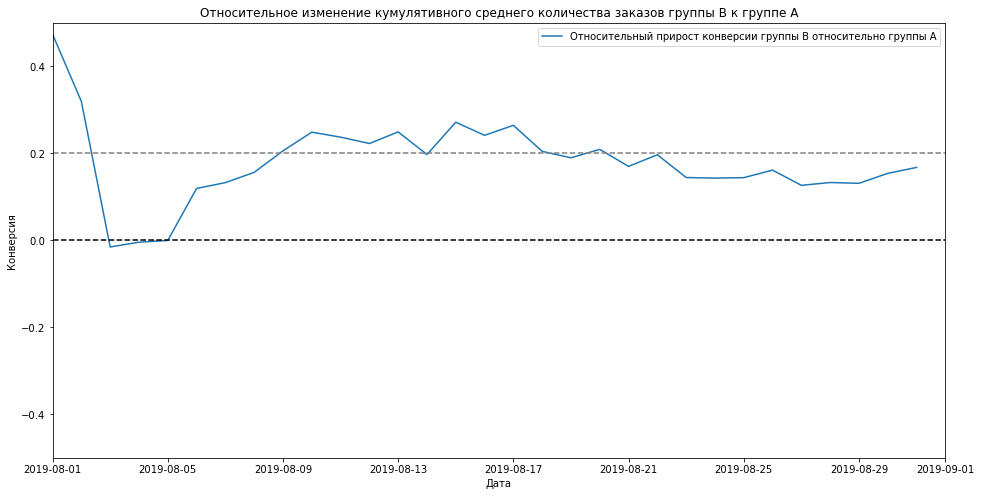

In [48]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData.query('group == "A"')
cumulativeDataB = cumulativeData.query('group == "B"')


mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].
    merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(16, 8))

plt.plot(mergedCumulativeConversions['date'],\
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

Относительный прирост конверсии группы В относительно группы А по очищенным данным в целом увеличился, по отношению к показателю расчитанному по сырым данным. 

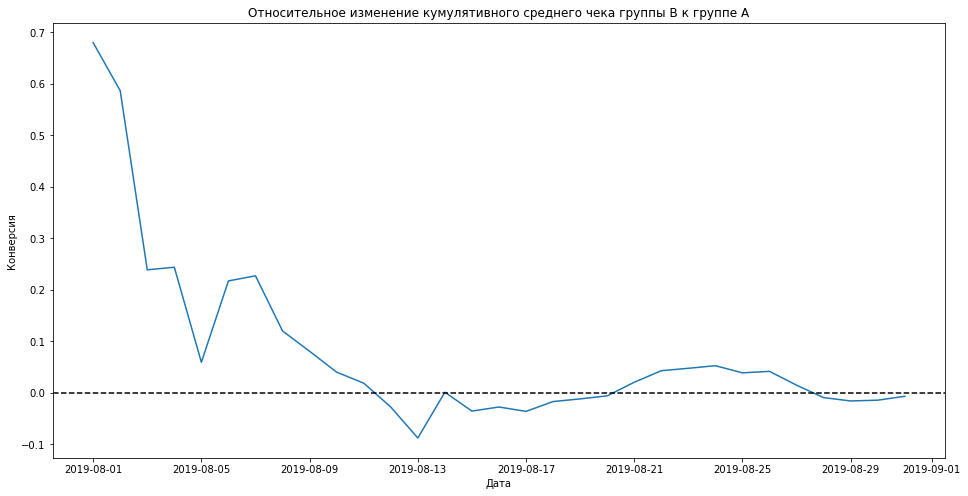

In [49]:
mergedCumulativeRevenue = (
    cumulativeRevenueA.
    merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(16, 8))

# cтроим отношение средних чеков
plt.plot\
(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']\
/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']\
/mergedCumulativeRevenue['ordersA'])-1,\
 label="Относительный прирост конверсии группы B относительно группы A")

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

Мы построили график относительного различия в среднем чеке между группами по очищенным данным. В начале месяца средний чек в группе В зничительно превышал средний чек в группе А, с середины месяца разница не превышала 5% и колебалась около отметки 0 то в большую сторону, то в меньшую.

## Часть 3.
## Выводы:

* В среднем количестве заказов между группами есть статистически значимые различия, и по сырым данным и по очищеным;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
* График различия среднего чека по ощищенным данным говорит о том, что результаты группы B значительно превосходили в первой половине теста, после 15 августа происходили несущественные колебания до 5 % то в меньшую то в большую сторону.
* Группы данных распределены не 50 на 50, различия почти на 14%. В группе В большее количество пользователей.

Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Различия в конверсии между группами пользователей могли образоваться из за неоднородности групп. Различий между размером среднего чека групп не выявлено. Возможно тест стоит начать заново, уделив внимание формированию выборки пользователей. Некоторые пользователи входят и в группу А и в группу В проведенного теста. Нет понимания, что это за тест, и как формировались выборки.